1. Strona tytułowa
Będziesz mieć standardową stronę tytułową z tytułem projektu, Twoim imieniem, nazwiskiem, datą, uczelnią itp.

2. Podsumowanie (executive summary)
W tym rozdziale krótko przedstawisz cel projektu, główne wyniki oraz wnioski:

Cel: Przewidywanie awarii maszyn na podstawie danych z czujników, co może pomóc w zapobieganiu nieplanowanym przestojom i optymalizacji kosztów konserwacji.
Wyniki: Zbudowanie modelu predykcyjnego, który może przewidzieć awarie maszyn na podstawie parametrów takich jak temperatura, wibracje, ciśnienie itp.
Wnioski: Dzięki wdrożeniu takiego modelu, firma może zmniejszyć koszty utrzymania i zwiększyć dostępność maszyn.
3. Opis organizacji
Opis organizacji, np. fabryki, która używa maszyn w swojej produkcji:

Rodzaj działalności: Produkcja przemysłowa (np. produkcja części samochodowych).
Rodzaj produktów: Produkty wytwarzane przez maszyny, które są kluczowe w procesie produkcji.
Wielkość organizacji: Średniej wielkości firma z kilkoma liniami produkcyjnymi.
Rodzaj rynku: Konkurencja w branży produkcji przemysłowej.
Główni konkurenci: Inne fabryki zajmujące się podobną produkcją.
4. Opis problemu
Decyzja: Jakie czynniki (parametry czujników) wskazują na ryzyko awarii maszyn?
Zbiór decyzji dopuszczalnych: Dane z czujników monitorujących różne parametry maszyn (np. temperatura, wibracje, ciśnienie).
Ocenianie skutków: Zysk z uniknięcia awarii maszyn, zmniejszenie przestojów, zmniejszenie kosztów napraw.
Założenia: Dane z czujników są dokładne, dane o awariach maszyn są dostępne w historycznych zestawach danych.
Dostępne dane: Historyczne dane z czujników (np. z IoT), awarie maszyn (czy i kiedy wystąpiły), dane o konserwacji.
5. Wyniki analizy
Model predykcyjny: Zbudowanie modelu, który przewiduje awarie na podstawie danych z czujników.
Interpretacja wyników: Jaki jest wpływ różnych zmiennych (np. temperatura, wibracje) na przewidywanie awarii.
Czy rozwiązanie jest akceptowalne? Tak, jeśli model może dokładnie przewidzieć awarie na podstawie dostępnych danych.
6. Analiza wrażliwości
W tym rozdziale przeanalizujesz, jak zmiany parametrów wpływają na wyniki modelu:

Zmiana parametrów: Jak zmiana np. temperatury o 5% wpłynie na przewidywanie awarii?
Meta-model: Można stworzyć prosty meta-model, który będzie tłumaczył, dlaczego model predykcyjny wybrał daną decyzję (np. ważność różnych parametrów).
7. Opis procedury uczenia
Modele rozpatrywane: Można rozważyć różne modele predykcyjne, np. regresję logistyczną, drzewa decyzyjne, Random Forest, SVM lub modele głębokiego uczenia (np. sieci neuronowe).
Wybór najlepszego modelu: Wybór modelu na podstawie metryk oceny (np. dokładność, precision, recall).
Dobór parametrów: Jak dobrać odpowiednie parametry do modelu (np. za pomocą GridSearch).
8. Wnioski i zalecenia
Jak wyniki mogą usprawnić działanie organizacji: Dzięki prognozowaniu awarii można zaplanować konserwację prewencyjną, co zmniejszy liczbę awarii i koszty napraw.
9. Bibliografia
Tutaj umieszczasz źródła literaturowe, artykuły, książki oraz dokumentację techniczną, z której korzystałeś.

Dalsze kroki:
Zbieranie danych: Jeśli masz dostęp do rzeczywistych danych z czujników (np. temperatury, wibracji), możesz je wykorzystać. Jeśli nie, możesz stworzyć fikcyjne dane na podstawie typowych parametrów maszyn przemysłowych.
Wybór algorytmu: Dobierz odpowiedni algorytm klasyfikacyjny lub regresyjny (np. SVM, Random Forest, sieci neuronowe).
Weryfikacja modelu: Sprawdź dokładność modelu przy użyciu walidacji krzyżowej i wybierz najlepszy model na podstawie metryk takich jak accuracy, precision, recall.

# Predykcja awarii maszyn

Imię i nazwisko: Kamil Olszewski
Data: 01.12.2024

## Podsumowanie
#### Cel:
Przewidywanie awarii maszyn na podstawie danych z czujników, co może pomóc w zapobieganiu nieplanowanym przestojom i optymalizacji kosztów konserwacji.

#### Wyniki:
Zbudowanie modelu predykcyjnego, który może przewidzieć awarie maszyn na podstawie parametrów takich jak temperatura, wibracje, ciśnienie itp.

#### Wnioski:
Dzięki wdrożeniu takiego modelu, firma może zmniejszyć koszty utrzymania i zwiększyć dostępność maszyn.

### Analiza

In [1]:
# Wczytanie danych i wstępna analiza

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
df = pd.read_csv('machine_failure_data.csv')

# Podstawowe informacje o danych
print(df.info())
print(df.describe())

# Sprawdzenie brakujących wartości
print(df.isnull().sum())

# Przykładowe wykresy
# sns.pairplot(df, hue='Failure')
# plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74880 entries, 0 to 74879
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine_ID           74880 non-null  object 
 1   Date                 74880 non-null  object 
 2   Temperature          74880 non-null  float64
 3   Vibration            74880 non-null  float64
 4   Pressure             74880 non-null  float64
 5   RPM                  74880 non-null  float64
 6   Humidity             74880 non-null  float64
 7   Oil_Level            74880 non-null  float64
 8   Oil_Pressure         74880 non-null  float64
 9   Working_Hours        74880 non-null  float64
 10  Ambient_Temperature  74880 non-null  float64
 11  Load                 74880 non-null  float64
 12  Machine_Age          74880 non-null  int64  
 13  Failure              74880 non-null  int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 8.0+ MB
None
        Temperature    

In [2]:
#Przygotowanie danych

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Podział na cechy (X) i etykiety (y)
X = df.drop(columns=['Machine_ID', 'Date', 'Failure'])
y = df['Failure']

# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Budowa modelu predykcyjnego

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Trenowanie modelu
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test_scaled)

# Ewaluacja modelu
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11749
           1       0.51      0.17      0.25      3227

    accuracy                           0.79     14976
   macro avg       0.66      0.56      0.56     14976
weighted avg       0.74      0.79      0.74     14976

[[11217   532]
 [ 2684   543]]


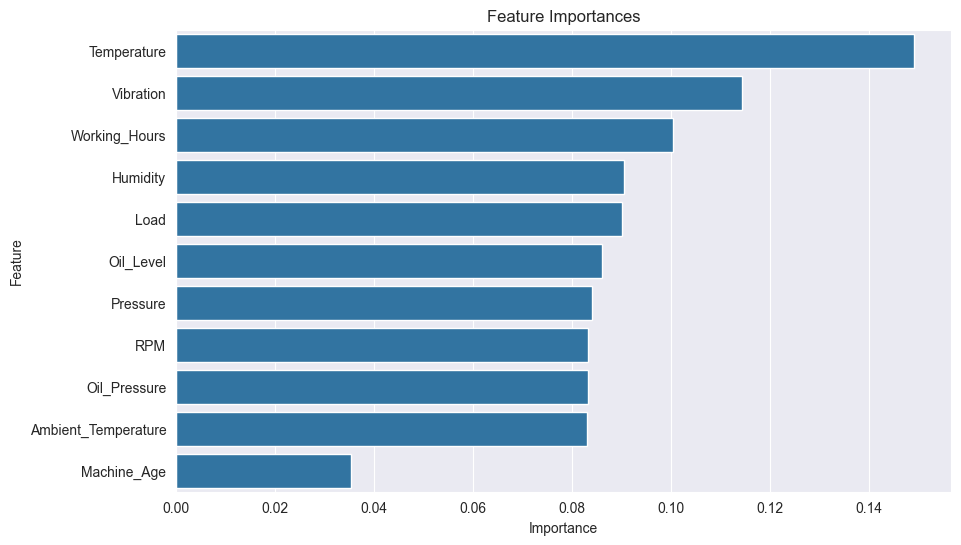

In [4]:
# Analiza wpływu zmiennych

importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Wykres ważności cech
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [5]:
# Wizualizacja wyników

# Wykresy korelacji
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Wykresy rozkładu zmiennych
for column in X.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

ValueError: could not convert string to float: 'M4000_L01_6390'

<Figure size 1200x800 with 0 Axes>

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74880 entries, 0 to 74879
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine_ID           74880 non-null  object 
 1   Date                 74880 non-null  object 
 2   Temperature          74880 non-null  float64
 3   Vibration            74880 non-null  float64
 4   Pressure             74880 non-null  float64
 5   RPM                  74880 non-null  float64
 6   Humidity             74880 non-null  float64
 7   Oil_Level            74880 non-null  float64
 8   Oil_Pressure         74880 non-null  float64
 9   Working_Hours        74880 non-null  float64
 10  Ambient_Temperature  74880 non-null  float64
 11  Load                 74880 non-null  float64
 12  Machine_Age          74880 non-null  int64  
 13  Failure              74880 non-null  int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 8.0+ MB
None

S

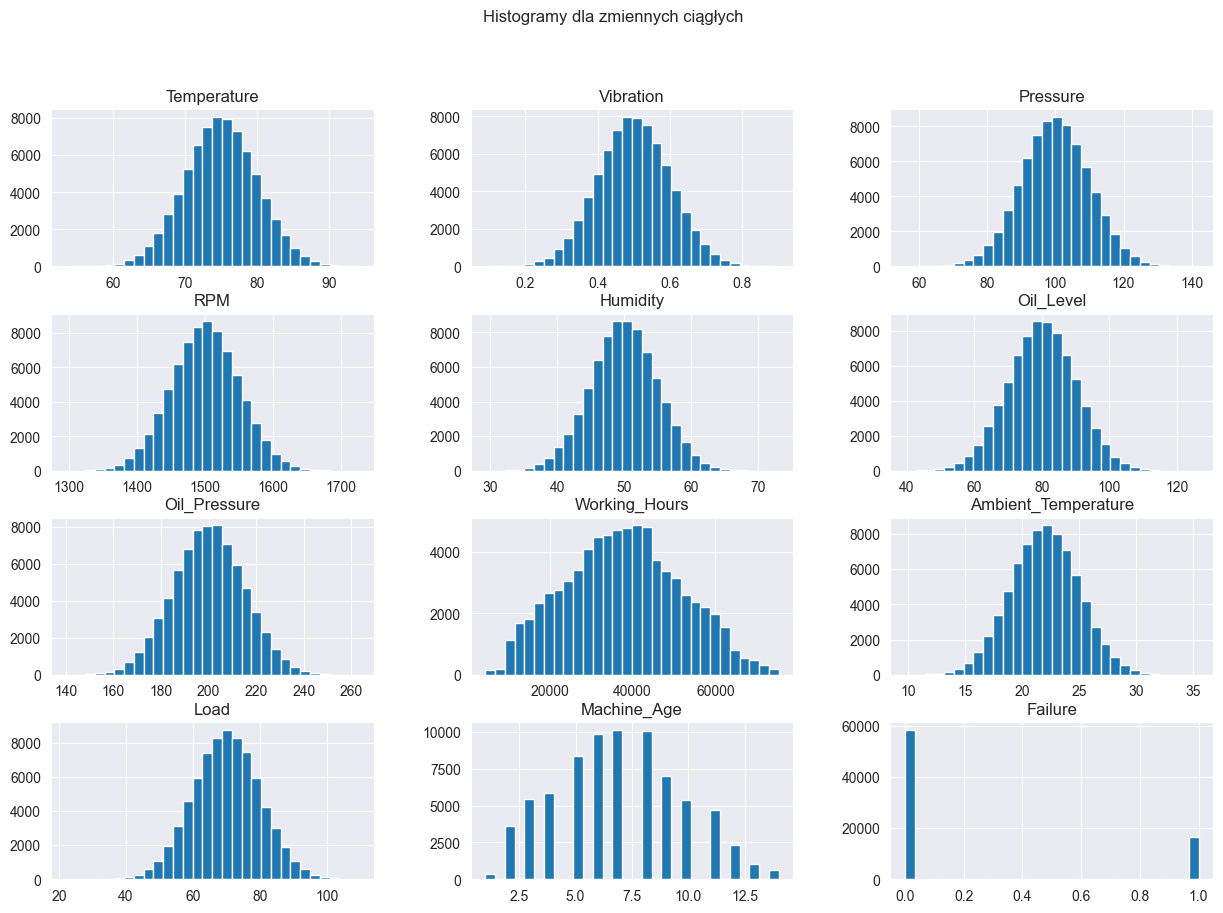

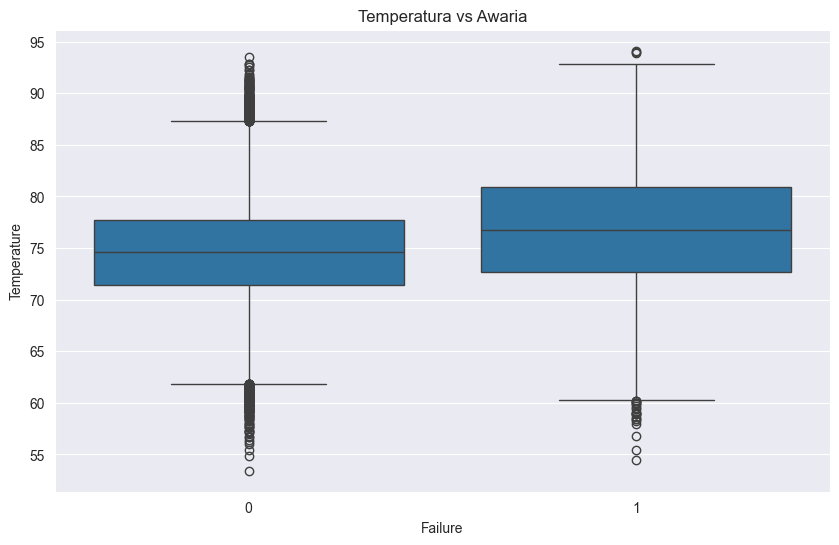

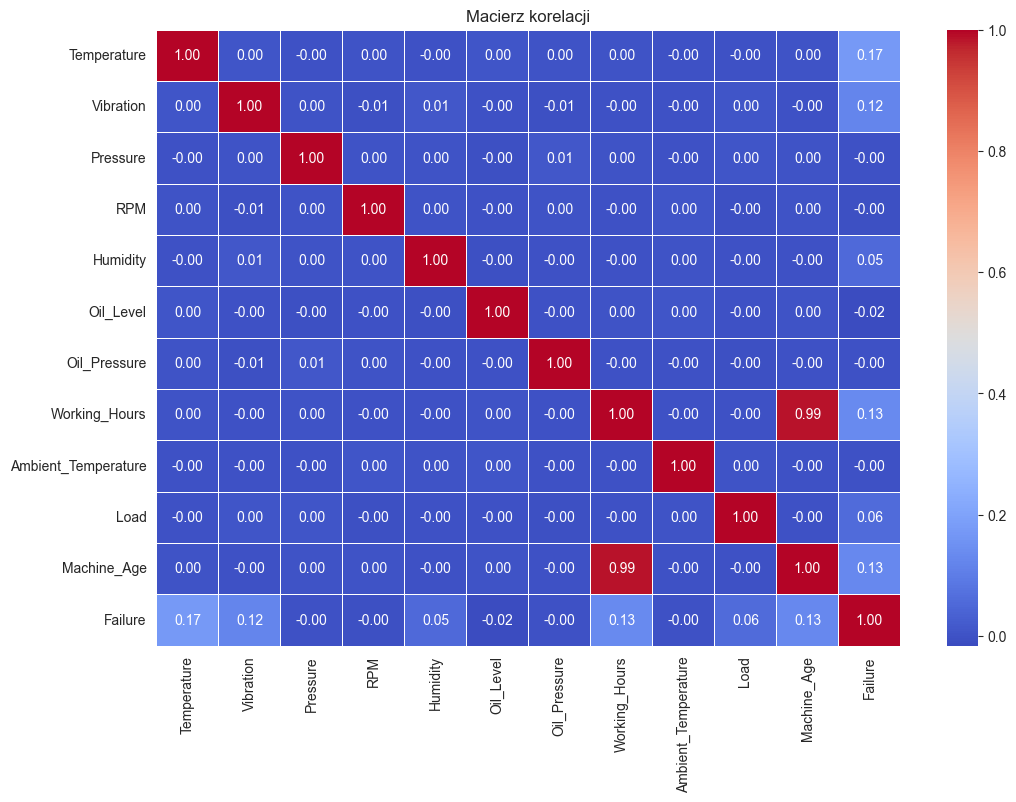

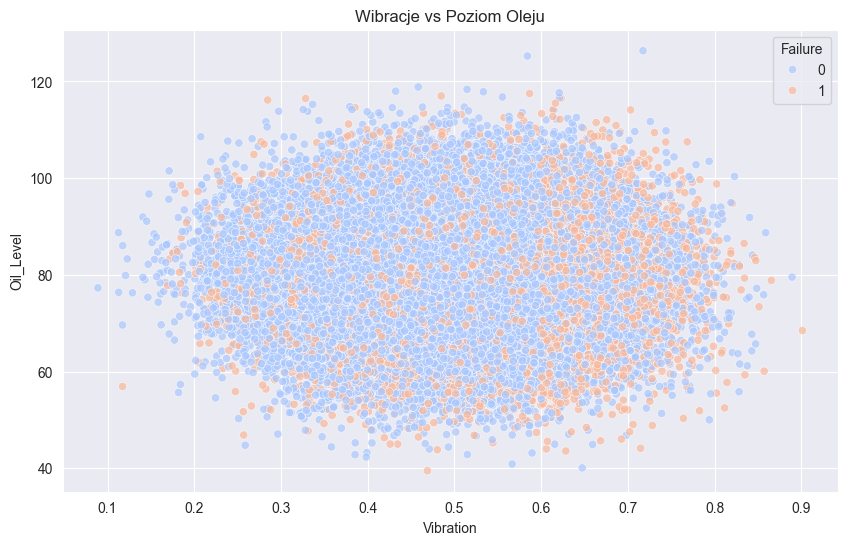

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Załadowanie danych z pliku CSV
# Upewnij się, że ścieżka do pliku jest poprawna
df = pd.read_csv('machine_failure_data.csv')  # Zmień na odpowiednią ścieżkę do pliku

# 2. Podstawowa analiza danych
# Informacje o danych
print("Informacje o danych:")
df_info = df.info()
print(df_info)

# Statystyki opisowe
print("\nStatystyki opisowe:")
df_description = df.describe()
print(df_description)

# Sprawdzamy brakujące wartości
print("\nBrakujące wartości:")
missing_values = df.isnull().sum()
print(missing_values)

# Wyświetlenie pierwszych 5 wierszy danych
print("\nPierwsze 5 wierszy danych:")
print(df.head())

# 3. Wizualizacja danych
# Histogramy dla zmiennych ciągłych
numerical_cols = df.select_dtypes(include=[np.number]).columns  # Wybór kolumn numerycznych
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramy dla zmiennych ciągłych')
plt.show()

# 4. Wykresy zależności - np. temperatura vs awaria
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Failure', y='Temperature')
plt.title('Temperatura vs Awaria')
plt.show()

# 5. Macierz korelacji
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

# 6. Dodatkowe wykresy - np. zależność wibracji vs poziom oleju
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Vibration', y='Oil_Level', hue='Failure', palette='coolwarm', alpha=0.7)
plt.title('Wibracje vs Poziom Oleju')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Wybór zmiennych wejściowych i wyjściowych
X = df[['Temperature', 'Vibration', 'Pressure', 'RPM', 'Humidity', 'Oil_Level', 'Oil_Pressure', 'Ambient_Temperature', 'Load', 'Machine_Age']]
y = df['Failure']

# 2. Podział danych na zbiór treningowy i testowy (80% trening, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizacja/standaryzacja (jeśli to konieczne)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Trenowanie modelu (np. Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 5. Predykcje na zbiorze testowym
y_pred = model.predict(X_test_scaled)

# 6. Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 7. Wyniki oceny
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7874
Precision: 0.5207
Recall: 0.1680
F1-score: 0.2540
Confusion Matrix:
[[11250   499]
 [ 2685   542]]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Wybór zmiennych wejściowych i wyjściowych
X = df[['Temperature', 'Vibration', 'Pressure', 'RPM', 'Humidity', 'Oil_Level', 'Oil_Pressure', 'Ambient_Temperature', 'Load', 'Machine_Age']]
y = df['Failure']

# 2. Podział danych na zbiór treningowy i testowy (80% trening, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizacja/standaryzacja (jeśli to konieczne)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Definiowanie modeli
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42),
    "Gradient Boosting (XGBoost)": GradientBoostingClassifier(random_state=42)
}

# 5. Trenowanie i ocena modeli
results = {}

for model_name, model in models.items():
    # Trenowanie modelu
    model.fit(X_train_scaled, y_train)

    # Predykcje na zbiorze testowym
    y_pred = model.predict(X_test_scaled)

    # Ocena modelu
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Zapisanie wyników modelu
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Confusion Matrix": conf_matrix
    }

# 6. Wyświetlenie wyników
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")




Logistic Regression:
Accuracy: 0.7863
Precision: 0.5434
Recall: 0.0524
F1-score: 0.0955
Confusion Matrix:
[[11607   142]
 [ 3058   169]]

Random Forest:
Accuracy: 0.7874
Precision: 0.5207
Recall: 0.1680
F1-score: 0.2540
Confusion Matrix:
[[11250   499]
 [ 2685   542]]

Support Vector Machine (SVM):
Accuracy: 0.7864
Precision: 0.6400
Recall: 0.0198
F1-score: 0.0385
Confusion Matrix:
[[11713    36]
 [ 3163    64]]

Gradient Boosting (XGBoost):
Accuracy: 0.7952
Precision: 0.5955
Recall: 0.1546
F1-score: 0.2455
Confusion Matrix:
[[11410   339]
 [ 2728   499]]


Porównanie wyników modeli:
                              Accuracy Precision    Recall  F1-score  \
Logistic Regression           0.786325  0.543408  0.052371  0.095534   
Random Forest                 0.787393  0.520653  0.167958  0.253983   
Support Vector Machine (SVM)  0.786392      0.64  0.019833  0.038473   
Gradient Boosting (XGBoost)   0.795206  0.595465  0.154633   0.24551   

                                         Confusion Matrix  
Logistic Regression           [[11607, 142], [3058, 169]]  
Random Forest                 [[11250, 499], [2685, 542]]  
Support Vector Machine (SVM)    [[11713, 36], [3163, 64]]  
Gradient Boosting (XGBoost)   [[11410, 339], [2728, 499]]  


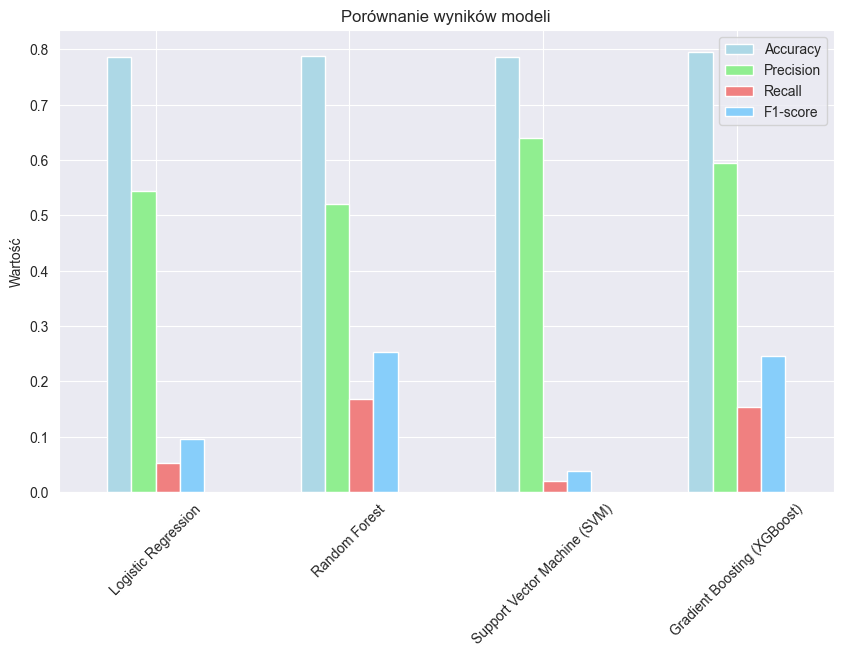

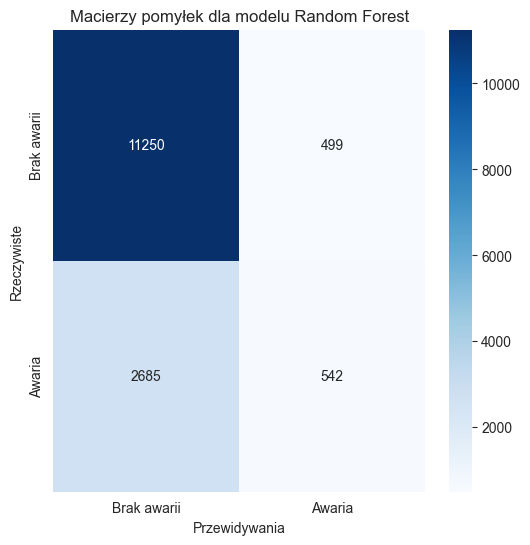


Wskaźniki klasyfikacji dla najlepszego modelu (Random Forest):
Precision: 0.5207
Recall: 0.1680
F1-score: 0.2540


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Podsumowanie wyników dla każdego modelu
results_df = pd.DataFrame(results).T
print("Porównanie wyników modeli:")
print(results_df)

# 2. Wizualizacja wyników – wykres słupkowy dla metryk
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
results_df[metrics].plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Porównanie wyników modeli')
plt.ylabel('Wartość')
plt.xticks(rotation=45)
plt.show()

# Upewnijmy się, że wyniki w results_df są typu numerycznego
results_df = results_df.apply(pd.to_numeric, errors='ignore')

# 3. Analiza macierzy pomyłek (Confusion Matrix) dla najlepszego modelu
best_model_name = results_df['F1-score'].idxmax()  # Wybór modelu z najwyższym F1-score
best_model = models[best_model_name]  # Użycie najlepszego modelu
y_pred_best = best_model.predict(X_test_scaled)

# Generowanie macierzy pomyłek
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Brak awarii', 'Awaria'], yticklabels=['Brak awarii', 'Awaria'])
plt.title(f'Macierzy pomyłek dla modelu {best_model_name}')
plt.xlabel('Przewidywania')
plt.ylabel('Rzeczywiste')
plt.show()

# 4. Wskaźniki klasyfikacji
TP = conf_matrix_best[1, 1]
FP = conf_matrix_best[0, 1]
TN = conf_matrix_best[0, 0]
FN = conf_matrix_best[1, 0]

# Precision, Recall, F1-score z macierzy pomyłek
precision_best = TP / (TP + FP)
recall_best = TP / (TP + FN)
f1_best = 2 * (precision_best * recall_best) / (precision_best + recall_best)

print(f"\nWskaźniki klasyfikacji dla najlepszego modelu ({best_model_name}):")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-score: {f1_best:.4f}")



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Definiowanie modelu Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Definiowanie przestrzeni hiperparametrów do przeszukania
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Użycie GridSearchCV do optymalizacji hiperparametrów
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

# Trening modelu
grid_search.fit(X_train_scaled, y_train)

# Najlepsze parametry
print(f"Best parameters: {grid_search.best_params_}")

# Predykcje na zbiorze testowym
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred_best_rf)
precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

# Wyniki oceny
print(f"Optimized Random Forest - Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest - Precision: {precision:.4f}")
print(f"Optimized Random Forest - Recall: {recall:.4f}")
print(f"Optimized Random Forest - F1-score: {f1:.4f}")
print(f"Optimized Random Forest - Confusion Matrix:\n{conf_matrix}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_spli

/opt/anaconda3/envs/ProductionWorkloadSimulation/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=

KeyboardInterrupt: 